In [53]:
import sys
sys.path.append('../algorithms/')

from CSOWP_SR import *
from ExpressionTree import *
from trainAlgorithm import *
import matplotlib.pyplot as plt

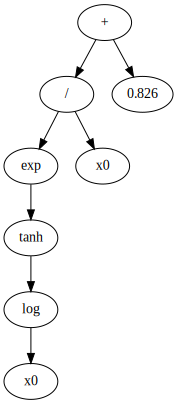

In [65]:
SR = SymbolicRegression(3)

X = np.linspace(-5, 15, 1000)
y = X**2
SR.fit(np.c_[X], y)

tree = SR.generate_expr()
tree.visualize_tree()

In [72]:
tree.toFunc(SR._operators, SR._functions)

(<function _lambdifygenerated(x0)>, 0.826 + exp(tanh(log(x0)))/x0)

In [76]:
SR._features['x0']

array([-5.00000000e+00, -4.97997998e+00, -4.95995996e+00, -4.93993994e+00,
       -4.91991992e+00, -4.89989990e+00, -4.87987988e+00, -4.85985986e+00,
       -4.83983984e+00, -4.81981982e+00, -4.79979980e+00, -4.77977978e+00,
       -4.75975976e+00, -4.73973974e+00, -4.71971972e+00, -4.69969970e+00,
       -4.67967968e+00, -4.65965966e+00, -4.63963964e+00, -4.61961962e+00,
       -4.59959960e+00, -4.57957958e+00, -4.55955956e+00, -4.53953954e+00,
       -4.51951952e+00, -4.49949950e+00, -4.47947948e+00, -4.45945946e+00,
       -4.43943944e+00, -4.41941942e+00, -4.39939940e+00, -4.37937938e+00,
       -4.35935936e+00, -4.33933934e+00, -4.31931932e+00, -4.29929930e+00,
       -4.27927928e+00, -4.25925926e+00, -4.23923924e+00, -4.21921922e+00,
       -4.19919920e+00, -4.17917918e+00, -4.15915916e+00, -4.13913914e+00,
       -4.11911912e+00, -4.09909910e+00, -4.07907908e+00, -4.05905906e+00,
       -4.03903904e+00, -4.01901902e+00, -3.99899900e+00, -3.97897898e+00,
       -3.95895896e+00, -

In [48]:
from scipy.optimize import curve_fit

def func(X, a, b, c):
    return a*np.exp(b*np.exp(c*X))

X = np.linspace(-5, 15, 1000)
y = func(X, 10, -0.5, -0.5)

try:
    curve_fit(func, X, y, [1,1,1])
except RuntimeError:
    print("oi")

oi


C:\Users\lreis\AppData\Local\Temp\ipykernel_20116\3832527126.py:4: RuntimeWarning: overflow encountered in exp
  return a*np.exp(b*np.exp(c*X))


# Dual Annealing

In [40]:
import numpy as np
from scipy.optimize import dual_annealing

# Generate some example data
# np.random.seed(42)
x_data = np.linspace(0, 1, 100)
# True parameters: a = 2, b = -1, c = 3
a_true, b_true, c_true = 10, -0.5, -0.5
y_data = a_true * np.exp(b_true * np.exp(c_true * x_data))
# Adding some noise to the data
# y_data += 0.1 * np.random.normal(size=x_data.size)

# Define the model function
def model(x, params):
    a, b, c = params
    return a * np.exp(b * np.exp(c * x))

# Define the objective function (sum of squared errors)
def objective_function(params):
    y_pred = model(x_data, params)
    return np.sum((y_data - y_pred) ** 2)

# Define bounds for each parameter
bounds = [(-10,10) for _ in range(3)]

# Perform Dual Annealing
result = dual_annealing(objective_function, bounds)

# Optimal Parameters
optimal_params = result.x
print("Optimal Parameters: a =", optimal_params[0], ", b =", optimal_params[1], ", c =", optimal_params[2])
print("Minimum Error:", result.fun)


C:\Users\lreis\AppData\Local\Temp\ipykernel_20116\123445131.py:16: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * np.exp(c * x))
C:\Users\lreis\AppData\Local\Temp\ipykernel_20116\123445131.py:21: RuntimeWarning: overflow encountered in square
  return np.sum((y_data - y_pred) ** 2)
C:\Users\lreis\AppData\Local\Temp\ipykernel_20116\123445131.py:16: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(b * np.exp(c * x))


Optimal Parameters: a = 9.996832759857059 , b = -0.49969823754748577 , c = -0.5004361371490337
Minimum Error: 9.883401018502416e-08


# Differential Evolution

In [26]:
import numpy as np
from scipy.optimize import differential_evolution

# Generate some example data
np.random.seed(42)
x_data = np.linspace(-5, 15, 1000)
# True parameters: a = 2, b = -1, c = 3
a_true, b_true, c_true = 10, -0.5, -0.5
y_data = a_true * np.exp(b_true * np.exp(c_true * x_data))
# Adding some noise to the data
# y_data += 0.1 * np.r4andom.normal(size=x_data.size)

# Define the model function
def model(x, a, b, c):
    # a, b, c = params
    return a * np.exp(b * np.exp(c * x))

# Define the objective function (sum of squared errors)
def objective_function(params):
    y_pred = model(x_data, *params)
    return np.mean((y_data - y_pred) ** 2)

# Define bounds for each parameter
bounds = [(-5, 10), (-5, 10), (-5, 10)]

# Perform Differential Evolution
result = differential_evolution(objective_function, bounds)

# Optimal Parameters
optimal_params = result.x
print("Optimal Parameters: a =", optimal_params[0], ", b =", optimal_params[1], ", c =", optimal_params[2])
print("Minimum Error:", result.fun)


C:\Users\lreis\AppData\Local\Temp\ipykernel_20116\74558808.py:16: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * np.exp(c * x))
C:\Users\lreis\AppData\Local\Temp\ipykernel_20116\74558808.py:21: RuntimeWarning: overflow encountered in square
  return np.mean((y_data - y_pred) ** 2)
C:\Users\lreis\AppData\Local\Temp\ipykernel_20116\74558808.py:16: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(b * np.exp(c * x))


Optimal Parameters: a = 10.0 , b = -0.5 , c = -0.5
Minimum Error: 0.0


In [1]:
from scipy.optimize import differential_evolution

def func(x, a, b, c):
    return a*np.exp(b*np.exp(c*x))

bounds = [(-10, 10), (-10, 10), (-10, 10)]

results = differential_evolution(func, bounds)

RuntimeError: The map-like callable must be of the form f(func, iterable), returning a sequence of numbers the same length as 'iterable'

# Gradient Descent is also very dependent of initial conditions, if the problems are not easily solvable

In [152]:
import numpy as np
from scipy.optimize import minimize

# Sample data
x_data = np.linspace(-5, 15, 1000)  # Example x values
y_data = model_function([10, -0.5, -0.5], x_data)  # Example y values

# Define your model function
def model_function(params, x):
    a, b, c = params
    return a * np.exp(b * np.exp(c * x))

def loss_function(params, x, y):
    y_pred = model_function(params, x)
    return np.mean((y - y_pred) ** 2)

# Define the Jacobian of the loss function (Mean Squared Error)
def loss_function_jacobian(params, x, y):
    a, b, c = params
    y_pred = model_function(params, x)
    residuals = y_pred - y
    gradient_a = 2 * np.mean(residuals * np.exp(b * np.exp(c * x)))
    gradient_b = 2 * np.mean(residuals * a * b * c* np.exp(b * np.exp(c * x) + c*x))
    gradient_c = 2 * np.mean(residuals * a*b*c*np.exp(b*np.exp(c*x) + c*x*(b*c*np.exp(c*x) + c)))
    return np.array([gradient_a, gradient_b, gradient_c])

# Initial guess for the parameters
initial_guess = [1, -1.0, -1.0]

# second_guess = [ 0.99866526,  0.80191825, -0.00961531]
# initial_guess = second_guess

# Perform optimization using Newton-CG method with the Jacobian
# result = minimize(loss_function, initial_guess, args=(x_data, y_data), method='Newton-CG', jac=loss_function_jacobian)
result = minimize(loss_function, initial_guess, args=(x_data, y_data), method='CG', options={"maxiter": 10000})

# Extract the optimized parameters
optimized_params = result.x

print("Optimized Parameters:", optimized_params)


Optimized Parameters: [ 9.99999993 -0.50000006 -0.50000012]
